2-	How long do fires typically last from start to extinction? Is there a correlation between the time of first intervention and the duration of the fire?

In [1]:
import pandas as pd

# Load the data
file_path = 'Registos_Incendios_SGIF_2011_2020.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the dataset
print(df.head())


  Codigo_SGIF  Codigo_ANEPC   Ano  Mes  Dia  Hora  AreaPov_ha  AreaMato_ha  \
0      DM2111           368  2011    1    1    17         0.0        0.010   
1      BL4112          1236  2011    1    9    22         0.0        0.000   
2      DM3111           820  2011    1   15    17         0.0        0.000   
3      BL2111          1977  2011    1   18    22         0.0        0.001   
4      DM2113          7930  2011    1   19    17         0.0        0.005   

   AreaAgric_ha  AreaTotal_ha  ...       ISI         DC       DMC       FFMC  \
0       0.00000       0.01000  ...  0.291930   4.092373  0.653638  54.525424   
1       0.00200       0.00200  ...  0.013831   1.835452  0.367371  32.001278   
2       0.00001       0.00001  ...  1.171990   9.658571  1.573768  74.889775   
3       0.00000       0.00100  ...  0.248910  12.477199  0.762519  51.102608   
4       0.00000       0.00500  ...  0.008092   3.968661  0.508191  32.290416   

        BUI  CodCausa     TipoCausa  \
0  0.934234

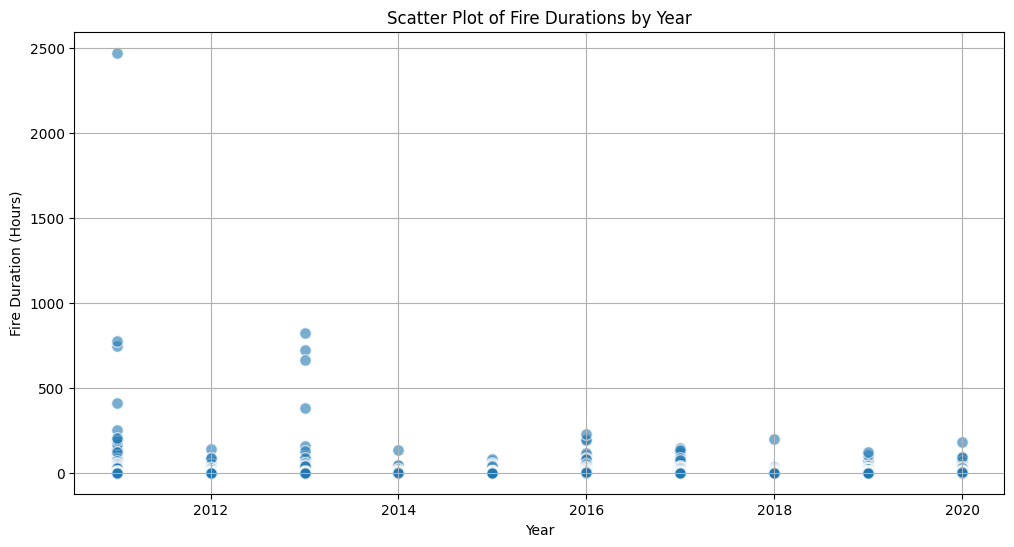

In [2]:
import matplotlib.pyplot as plt

# Ensure that the duration column is present and valid
df['Duracao_Horas'] = pd.to_numeric(df['Duracao_Horas'], errors='coerce')

# Drop rows with NaN values in Duracao_Horas
df = df.dropna(subset=['Duracao_Horas'])

# Extract the year from 'DataHoraAlerta'
df['Year'] = df['DataHoraAlerta'].dt.year

# Scatter plot of fire durations with years on the x-axis
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Duracao_Horas'], alpha=0.6, edgecolors='w', s=70)
plt.xlabel('Year')
plt.ylabel('Fire Duration (Hours)')
plt.title('Scatter Plot of Fire Durations by Year')
plt.grid(True)
plt.show()

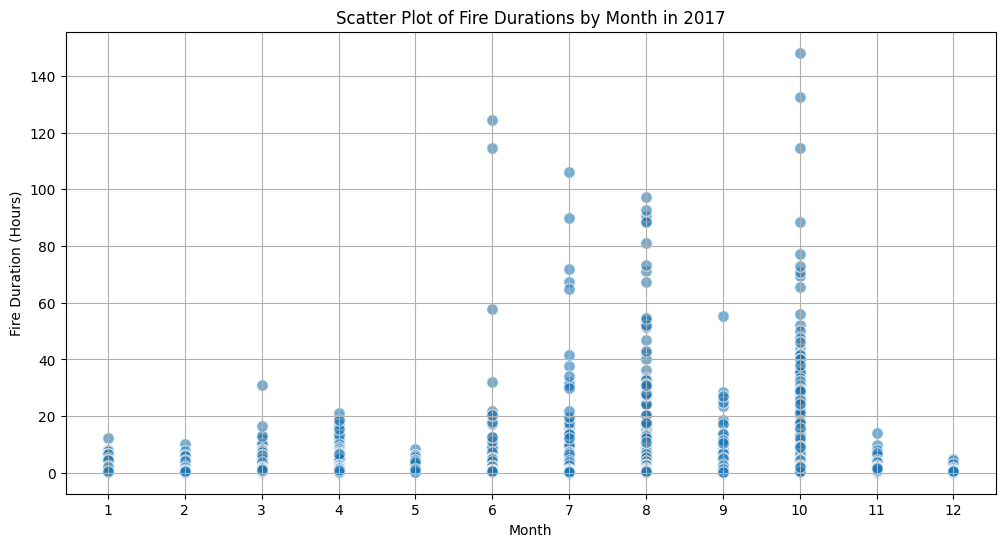

In [3]:
import matplotlib.pyplot as plt

# Drop rows with NaN values in Duracao_Horas
df = df.dropna(subset=['Duracao_Horas'])

# Extract the year and month from 'DataHoraAlerta'
df['Year'] = df['DataHoraAlerta'].dt.year
df['Month'] = df['DataHoraAlerta'].dt.month

# Filter the dataset for a specific year (e.g., 2017)
specific_year = 2017
df_specific_year = df[df['Year'] == specific_year]

# Scatter plot of fire durations by month for the specific year
plt.figure(figsize=(12, 6))
plt.scatter(df_specific_year['Month'], df_specific_year['Duracao_Horas'], alpha=0.6, edgecolors='w', s=70)
plt.xlabel('Month')
plt.ylabel('Fire Duration (Hours)')
plt.title(f'Scatter Plot of Fire Durations by Month in {specific_year}')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

        count      mean       std       min       25%       50%       75%  \
Month                                                                       
1       149.0  1.137472  0.915730  0.166667  0.566667  0.883333  1.333333   
2      1443.0  1.411562  1.365974  0.016667  0.650000  1.050000  1.750000   
3       201.0  1.153897  0.907221  0.033333  0.533333  0.883333  1.433333   
4      1056.0  1.557165  1.349966  0.033333  0.700000  1.133333  1.916667   
5      2085.0  1.174916  1.127819  0.016667  0.550000  0.883333  1.416667   
6       583.0  0.721698  0.708679  0.016667  0.333333  0.566667  0.883333   
7       756.0  0.657033  0.551076  0.016667  0.333333  0.500000  0.783333   
8      2248.0  1.051920  4.468304  0.016667  0.400000  0.633333  1.033333   
9      1818.0  1.017528  1.585220  0.000000  0.400000  0.650000  1.095833   
10     1817.0  1.277683  1.926831  0.016667  0.500000  0.816667  1.366667   
11       57.0  1.005263  0.825824  0.050000  0.500000  0.666667  1.366667   

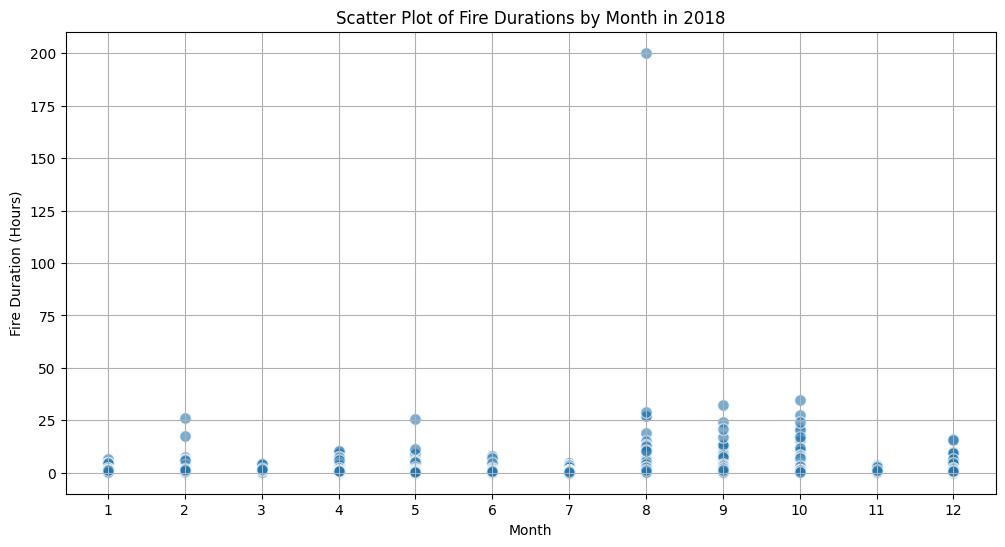

<Figure size 1200x600 with 0 Axes>

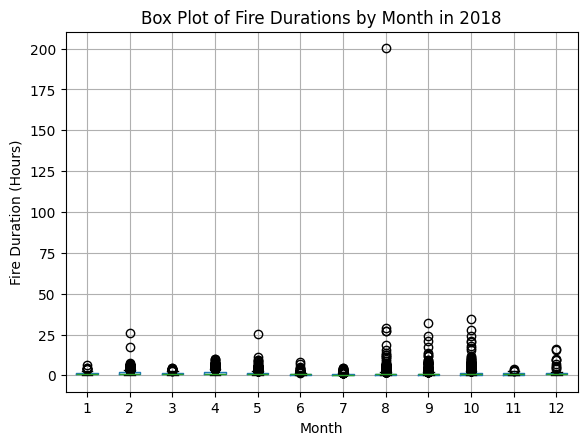

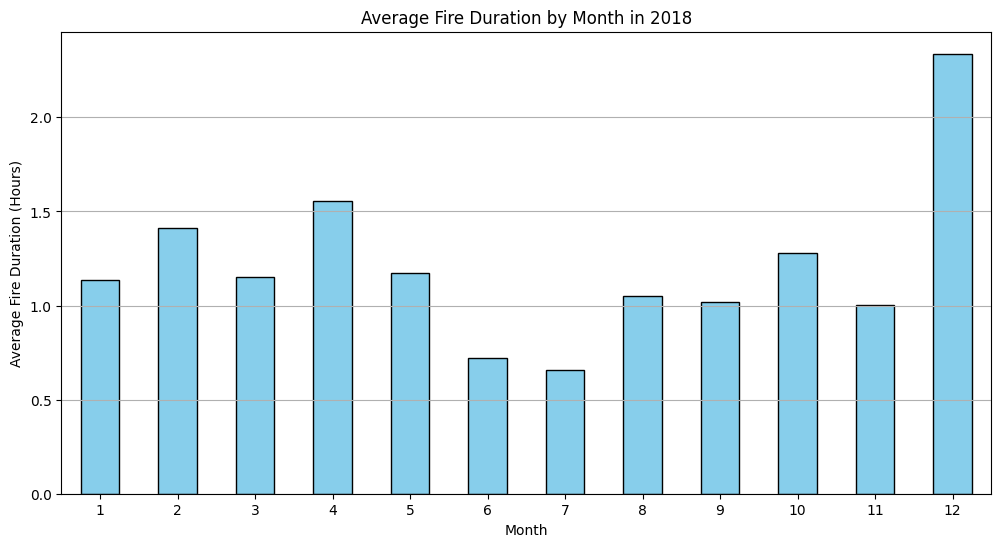

In [4]:
import matplotlib.pyplot as plt

# Drop rows with NaN values in Duracao_Horas
df = df.dropna(subset=['Duracao_Horas'])

# Filter the dataset for a specific year (e.g., 2017)
specific_year = 2018
df_specific_year = df[df['Year'] == specific_year]

# Summary statistics
summary_stats = df_specific_year.groupby('Month')['Duracao_Horas'].describe()
print(summary_stats)

# Scatter plot of fire durations by month for the specific year
plt.figure(figsize=(12, 6))
plt.scatter(df_specific_year['Month'], df_specific_year['Duracao_Horas'], alpha=0.6, edgecolors='w', s=70)
plt.xlabel('Month')
plt.ylabel('Fire Duration (Hours)')
plt.title(f'Scatter Plot of Fire Durations by Month in {specific_year}')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Box plot of fire durations by month
plt.figure(figsize=(12, 6))
df_specific_year.boxplot(column='Duracao_Horas', by='Month', grid=True)
plt.xlabel('Month')
plt.ylabel('Fire Duration (Hours)')
plt.title(f'Box Plot of Fire Durations by Month in {specific_year}')
plt.suptitle('')
plt.show()

# Bar plot of average fire duration by month
average_duration_by_month = df_specific_year.groupby('Month')['Duracao_Horas'].mean()

plt.figure(figsize=(12, 6))
average_duration_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Average Fire Duration (Hours)')
plt.title(f'Average Fire Duration by Month in {specific_year}')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()